## Importaciones

In [88]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


## Cargamos los datos
Disponibles en [este link](https://thecleverprogrammer.com/wp-content/uploads/2020/05/churn.csv).

In [60]:
df = pd.read_csv("../churn.csv")
df.columns.values
df.drop('customerID', axis=1, inplace=True)

In [61]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [62]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Breves representaciones gráficas
Nos interesa ver cómo se distirbuye "Churn" yes o no para diversas variables.

<Axes: xlabel='Churn'>

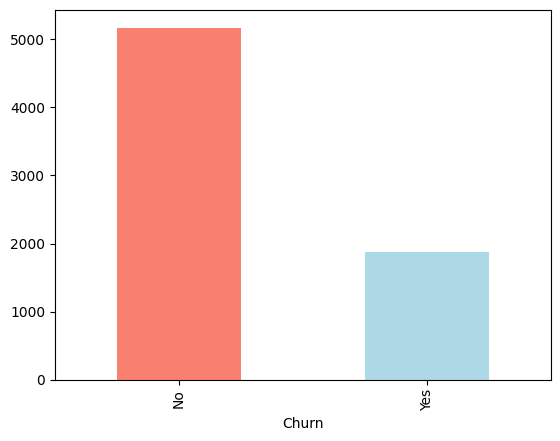

In [63]:
df["Churn"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [64]:
numRetained = df[df.Churn == 'No'].shape[0]
numChurned = df[df.Churn == 'Yes'].shape[0]

# Imprime el % de clientes retenidos
print(numRetained/(numRetained + numChurned) * 100,'% de clientes retenidos')
# Imprime el % de clientes que se fueron
print(numChurned/(numRetained + numChurned) * 100, '% de clientes perdidos')

73.4630129206304 % de clientes retenidos
26.536987079369588 % de clientes perdidos


<Axes: xlabel='gender', ylabel='count'>

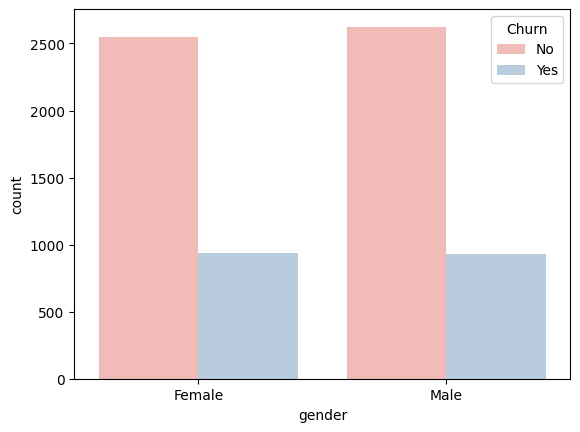

In [65]:
sns.countplot(x ='gender', hue='Churn', data=df, palette="Pastel1")


<Axes: xlabel='InternetService', ylabel='count'>

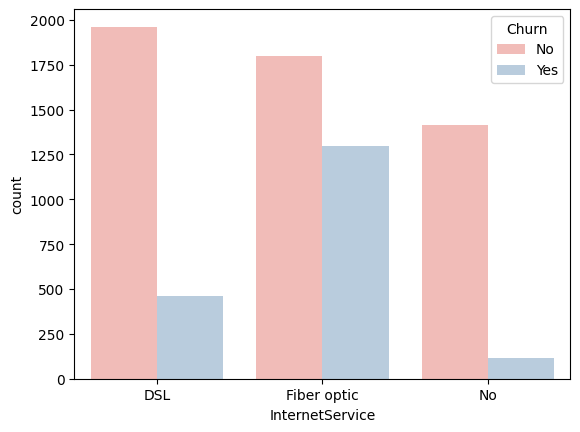

In [66]:
sns.countplot(x='InternetService', hue='Churn', data=df, palette='Pastel1')

### Visualizamos los datos numéricos

array([<Axes: title={'center': 'tenure'}>,
       <Axes: title={'center': 'MonthlyCharges'}>], dtype=object)

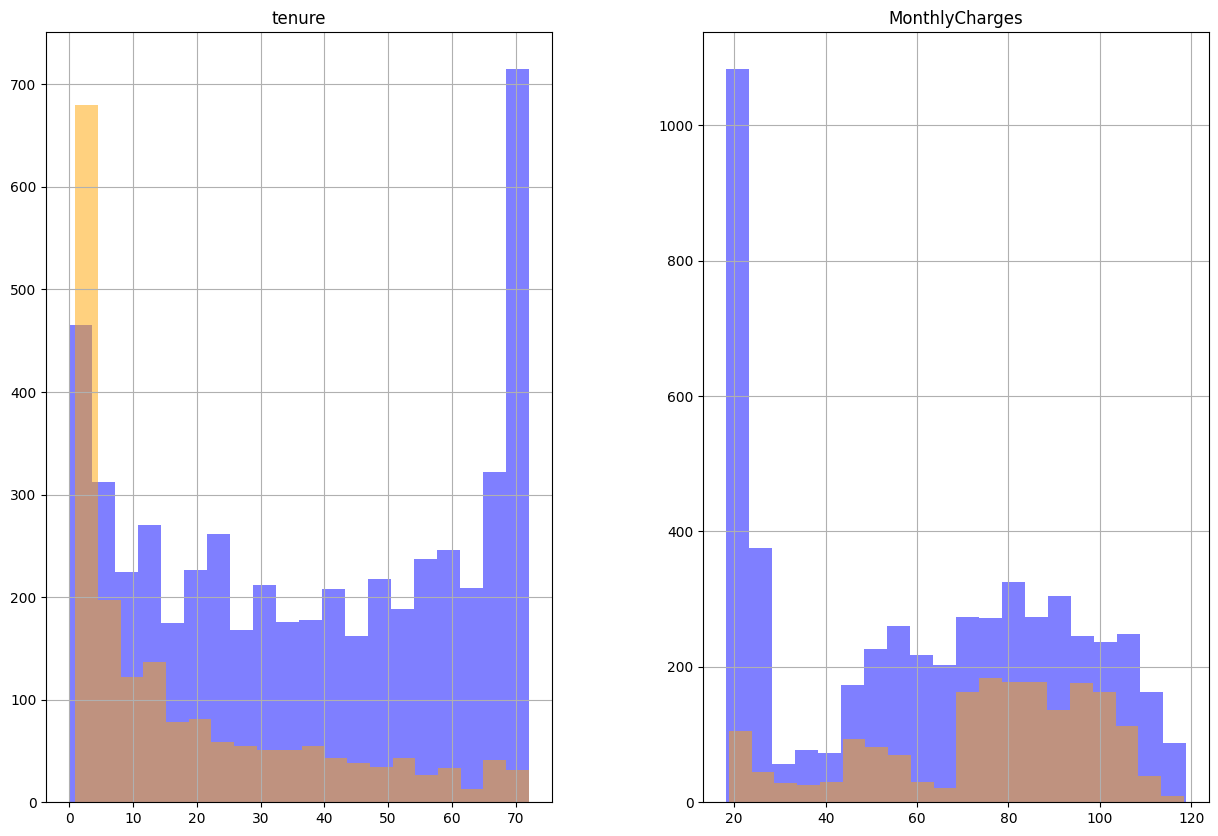

In [67]:
numericFeatures = ['tenure', 'MonthlyCharges']

fig, ax = plt.subplots(1,2, figsize=(15, 10))

df[df.Churn == "No"][numericFeatures].hist(
    bins=20, color='blue', alpha=0.5, ax=ax)

df[df.Churn == "Yes"][numericFeatures].hist(
    bins=20, color='orange', alpha=0.5, ax=ax)

### Convertimos las columnas no numéricas a numérico
Con LabelEncoder

In [70]:
for column in df.columns:
    if df[column].dtype == np.int64:
        continue
    if df[column].dtype == np.float64:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

In [72]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


### Escalamos los datos

In [74]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X = StandardScaler().fit_transform(X)

### Dividimos en train (80%) y test (20%)

In [79]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=42)

### Entrenamos el modelo

In [80]:
model = LogisticRegression()
# Entrenar el modelo
model.fit(xtrain, ytrain)

LogisticRegression()

### Crear las predicciones en los datos de test

In [82]:
predictions = model.predict(xtest)

print(predictions)

[1 0 0 ... 0 0 0]


### Revisar métricas
Precisión, recall y f1-score

In [95]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [96]:
# Creamos una matriz de confusión
cm = confusion_matrix(ytest, predictions)
print(cm)

[[940  96]
 [163 210]]


Parece que el modelo tiende a marcar más falsos positivos que falsos negativos.